# Project: Wrangling and Analyze Data

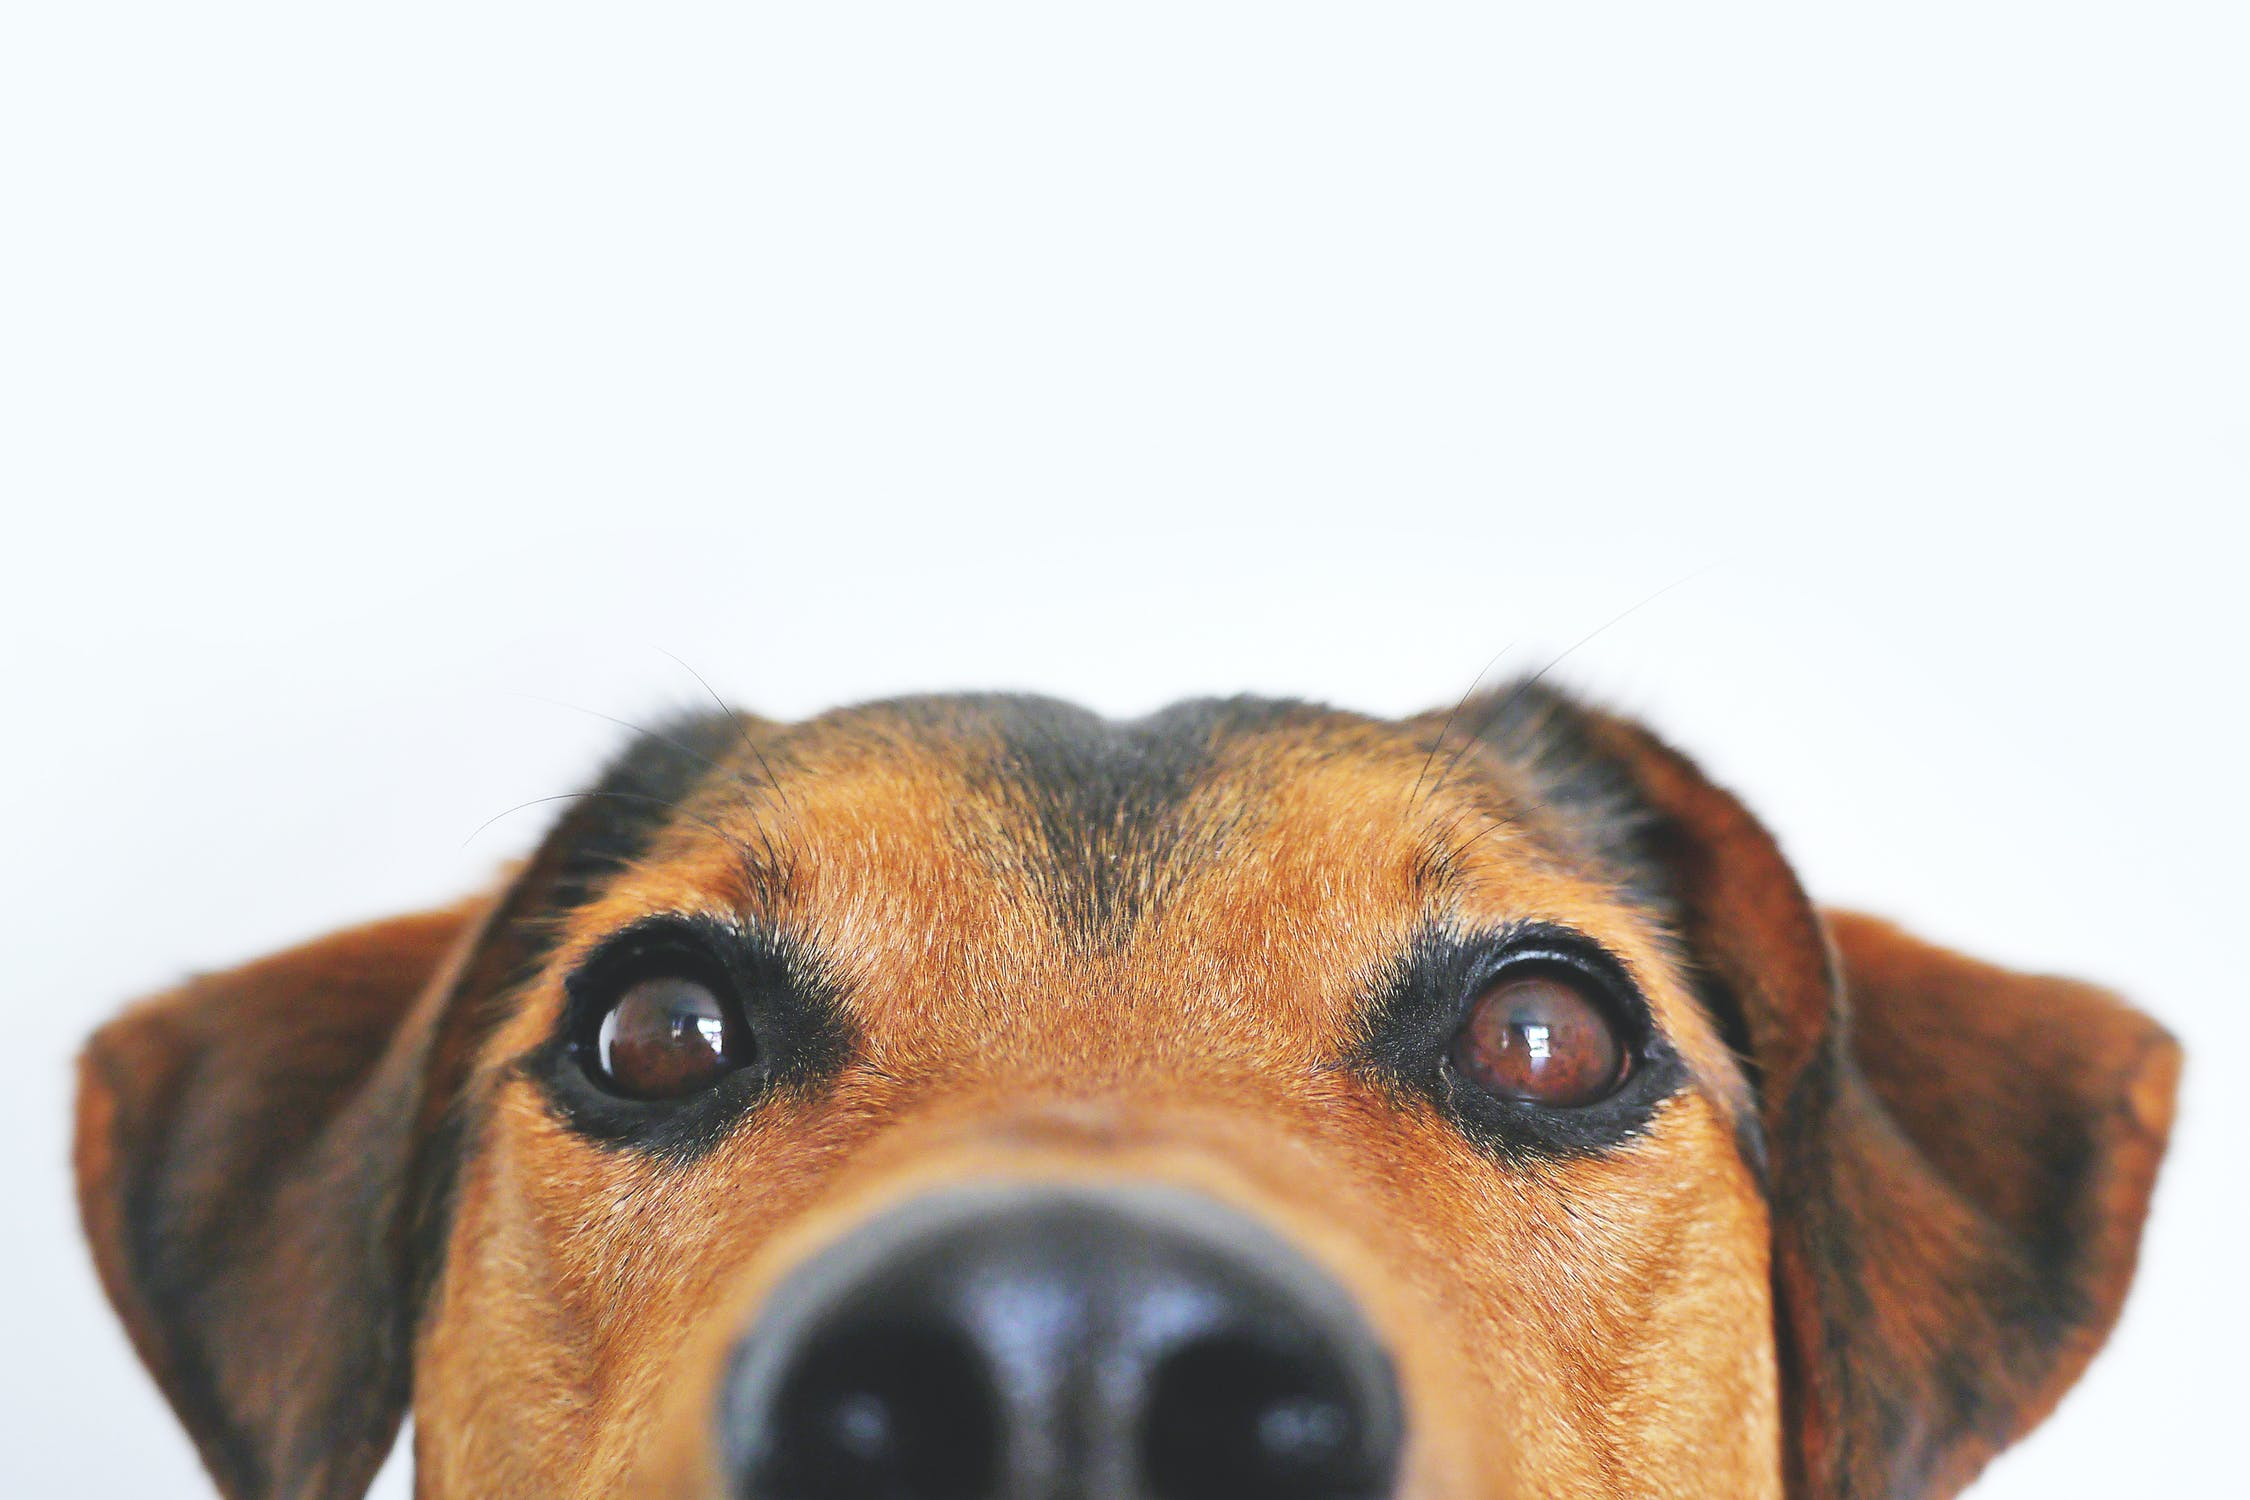

## Introduction
The tweet archive of Twitter user @dog_rates, better known as WeRateDogs, is the dataset I'll be wrangling, analyzing and visualizing. WeRateDogs is a Twitter account that gives individuals ratings for their dogs along with a funny comment about the dog. WeRateDogs emailed their Twitter archive, which I was able to utilize solely for this project. This archive provides basic tweet information (tweet ID, timestamp, text, and so on) for all of their 5000+ tweets as of August 1, 2017.

## Goal:
My objective is to wrangle the Twitter data from WeRateDogs in order to create interesting and reliable analysis and visualizations. The Twitter archive is great, but it only includes the most basic information about tweets. For "Wow!" (worthy analysis and visualizations), further gathering, evaluating, and cleaning is necessary.

## The Data
The following three datasets will be used in this study.

- **Enhanced Twitter Archive:** This includes basic tweet data for all of their 5000+ tweets, but not all of it. I wanted to utilize this file, so I downloaded it.

- **Additional Data via the Twitter API:** Returning to the Twitter archives, retweet count and favorite count are two notable column exclusions. Using the tweet IDs from the WeRateDogs Twitter archive, I'd use Python's Tweepy package to query the Twitter API for each tweet's JSON data, then save each tweet's whole set of JSON data in a file named tweet_json.txt. The .txt file is read into a pandas DataFrame

- **Image Predictions File:** The tweet image predictions includes a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

---------------

## Data Gathering

In [2]:
import pandas as pd
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
#importing library
import os

# If a directory does not already exist, create one.
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
import requests

In [10]:
#Using the Requests library, I'll get the tweet image predictions TSV and save it as image predictions.tsv.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create a file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#Import the TSV file with tweet image predictions into a DataFrame.
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Explaining the code above: 
- Requesting a file from a cloud storage service.
- The response from the service is stored in a variable `response`.
- Next is to open a text file called "image_predictions.tsv" in write mode.
- Then write the response content to the file.
- Read  the csv called "image_predictions.tsv" and separates the data by tabs.
- Lastly show the first five rows of the data.

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [11]:
import tweepy as tw
# your Twitter API key and API secret
my_api_key = "I4#############"
my_api_secret = "sl#######################"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [15]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

I'm going to use the Tweepy library to query each tweet's retweet and favorite ("like") count and save the results in tweet json.txt, but first I'm going to query Twitter's API for JSON data for each tweet ID in the Twitter archive.

In [36]:
#Understanding how to use Python – API.get_status() in Tweepy

ID = 1256931752171515904
# obtaining the status
status = api.get_status(ID)
  
# printing the text of the status
print("The text of the status is : \n\n" + status.text)
  
# printing the screen name
print("\nThe status was posted by : " + status.user.screen_name)
  
# printing the number of likes
print("The status has been liked " + str(status.favorite_count) + " number of times.")
  
# printing the number of retweets
print("The status has been retweeted " + str(status.retweet_count) + " number of times.")

# the amount of people who follow the person who tweeted
print("The number of followers of the user is " + str(status.user.followers_count))
      
# the number of favorites for the tweeter
print("The number of favourites for the user who tweeted is " + str(status.user.favourites_count))

# the timestamp, or the date and time when the tweet was created
print("the timestamp of when the tweet was created is " + str(status.created_at))

The text of the status is : 

Stella Obasanjo. https://t.co/iQaCLpp8Uu

The status was posted by : ikev007
The status has been liked 23613 number of times.
The status has been retweeted 4816 number of times.
The number of followers of the user is 4534
The number of favourites for the user who tweeted is 12689
the timestamp of when the tweet was created is 2020-05-03 13:00:57+00:00


In [21]:
from timeit import default_timer as timer
import tweepy
from tweepy import OAuthHandler
import json


#making a list for exceptions/errors in tweets
tweet_errors = []

# List of tweets
tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to tweets
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json
        
        favorites = tweet['favorite_count'] #the number of people who liked the tweet
        retweets = tweet['retweet_count'] # the total number of retweets 
        user_followers = tweet['user']['followers_count'] # the amount of people who follow the person who tweeted
        user_favourites = tweet['user']['favourites_count'] # the number of favorites for the tweeter
        date_time = tweet['created_at'] # the timestamp, or the date and time when the tweet was created
        
        tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+" has"+" Failed")
        tweet_errors.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 has Failed
873697596434513921 has Failed
872668790621863937 has Failed
872261713294495745 has Failed
869988702071779329 has Failed
866816280283807744 has Failed
861769973181624320 has Failed
856602993587888130 has Failed
856330835276025856 has Failed
851953902622658560 has Failed
851861385021730816 has Failed
845459076796616705 has Failed
844704788403113984 has Failed
842892208864923648 has Failed
837366284874571778 has Failed
837012587749474308 has Failed
829374341691346946 has Failed
827228250799742977 has Failed
812747805718642688 has Failed
802247111496568832 has Failed
779123168116150273 has Failed
775096608509886464 has Failed
771004394259247104 has Failed
770743923962707968 has Failed
766864461642756096 has Failed
759923798737051648 has Failed
759566828574212096 has Failed
754011816964026368 has Failed


Rate limit reached. Sleeping for: 355


680055455951884288 has Failed
677335745548390400 has Failed
677334615166730240 has Failed
677331501395156992 has Failed
677328882937298944 has Failed
677314812125323265 has Failed
677301033169788928 has Failed
677269281705472000 has Failed
677228873407442944 has Failed
677187300187611136 has Failed
676975532580409345 has Failed
676957860086095872 has Failed
676949632774234114 has Failed
676948236477857792 has Failed
676946864479084545 has Failed
676942428000112642 has Failed
676936541936185344 has Failed
676916996760600576 has Failed
676897532954456065 has Failed
676864501615042560 has Failed
676821958043033607 has Failed
676819651066732545 has Failed
676811746707918848 has Failed
676776431406465024 has Failed
676617503762681856 has Failed
676613908052996102 has Failed
676606785097199616 has Failed
676603393314578432 has Failed
676593408224403456 has Failed
676590572941893632 has Failed
676588346097852417 has Failed
676582956622721024 has Failed
676575501977128964 has Failed
6765337988

670833812859932673 has Failed
670832455012716544 has Failed
670826280409919488 has Failed
670823764196741120 has Failed
670822709593571328 has Failed
670815497391357952 has Failed
670811965569282048 has Failed
670807719151067136 has Failed
670804601705242624 has Failed
670803562457407488 has Failed
670797304698376195 has Failed
670792680469889025 has Failed
670789397210615808 has Failed
670786190031921152 has Failed
670783437142401025 has Failed
670782429121134593 has Failed
670780561024270336 has Failed
670778058496974848 has Failed
670764103623966721 has Failed
670755717859713024 has Failed
670733412878163972 has Failed
670727704916926465 has Failed
670717338665226240 has Failed
670704688707301377 has Failed
670691627984359425 has Failed
670679630144274432 has Failed
670676092097810432 has Failed
670668383499735048 has Failed
670474236058800128 has Failed
670468609693655041 has Failed
670465786746662913 has Failed
670452855871037440 has Failed
670449342516494336 has Failed
6704449556

666020888022790149 has Failed
Total time taken for execution 1556.969453573227


### Explaining the code above

1. The code is iterating through a list of tweet ids.

2. For each tweet id, it tries to get the tweet from the Twitter API.

3. If the tweet is successfully retrieved, the code calculates the number of favorites and retweets, user_followers, user favourites and date_time for the tweet.

4. The code then appends a new row to the tweets list, with all the calculated values while also implementing the correct datatype.

5. If there is an exception while retrieving the tweet, the code logs the exception and adds the tweet id to a list.

In [22]:
print(len(tweets))

1762


I'm generating a DataFrame with the following columns from the tweets:

- user followers 
- user favourites 
- date time 
- tweet id 
- favorites 
- retweets

Next is to save the DataFrame to the 'tweet_json.txt' file.


In [29]:
tweets_json = pd.DataFrame(tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

In [31]:
tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [32]:
df_api = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df_api.head()

tweet_id  favorites  retweets  user_followers  user_favourites  \
0  892420643555336193      33858      7023         9268927           146816   
1  892177421306343426      29346      5304         9269410           146826   
2  891815181378084864      22081      3487         9268927           146816   
3  891689557279858688      36981      7236         9268927           146816   
4  891327558926688256      35355      7773         9268927           146816   

                   date_time  
0  2017-08-01 16:23:56+00:00  
1  2017-08-01 00:17:27+00:00  
2  2017-07-31 00:18:03+00:00  
3  2017-07-30 15:58:51+00:00  
4  2017-07-29 16:00:24+00:00

### Explaining the code

- The code creates a dataframe from the tweets JSON file.
- The code sets the columns of the dataframe to the tweet_id, favorites, retweets, user_followers, user_favorites, and date_time fields in the JSON file.
- The .to_csv() function is used to write the data in our 'tweets_json' variable to a .csv file called 'tweet_json.txt'.
- Then it's  specified that the .csv file should be encoded in 'utf-8' and that the index should be False (which will prevent the creation of a header row in the .csv file).

----------------------------------------------------------------------------------------------------------------

## Assessing Data
After gathering all three pieces of information, I'll visually and programmatically evaluate them for quality and tidiness issues.

The following issue will be evaluated:

- I only want original ratings with images (no retweets). Although the dataset contains over 5000 tweets, not all of them are dog ratings, and some are retweets.

Completeness, validity, accuracy, and consistency are some of the characteristics or criteria used to evaluate data quality.


### Displaying each table

- I'll be displaying the first five rows  and the last five rows and also a sample of the data to visually inspect the data

## Visual assessment

In [48]:
# Check the first five rows
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [49]:
#Check the last five rows
twitter_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [50]:
#The sample() function is used to get a random sample of items from an axis of object.
twitter_archive.sample(15)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
325   833863086058651648                    NaN                  NaN   
2108  670452855871037440                    NaN                  NaN   
2253  667793409583771648                    NaN                  NaN   
2189  668967877119254528           6.689207e+17           21435658.0   
264   842163532590374912                    NaN                  NaN   
1475  693642232151285760                    NaN                  NaN   
1231  713177543487135744                    NaN                  NaN   
740   780543529827336192                    NaN                  NaN   
1388  700462010979500032                    NaN                  NaN   
271   841077006473256960                    NaN                  NaN   
1057  742150209887731712                    NaN                  NaN   
664   790723298204217344                    NaN                  NaN   
2307  666826780179869698                    NaN                  NaN   
1286  708400866336894977                    NaN                  NaN   
939   753039830821511168                    NaN                  NaN   

                      timestamp  \
325   2017-02-21 02:17:06 +0000   
2108  2015-11-28 04:03:11 +0000   
2253  2015-11-20 19:55:30 +0000   
2189  2015-11-24 01:42:25 +0000   
264   2017-03-16 00:00:07 +0000   
1475  2016-01-31 03:49:30 +0000   
1231  2016-03-25 01:35:51 +0000   
740   2016-09-26 23:04:13 +0000   
1388  2016-02-18 23:28:52 +0000   
271   2017-03-13 00:02:39 +0000   
1057  2016-06-13 00:22:53 +0000   
664   2016-10-25 01:14:59 +0000   
2307  2015-11-18 03:54:28 +0000   
1286  2016-03-11 21:15:02 +0000   
939   2016-07-13 01:34:21 +0000   

                                                 source  \
325   <a href="http://twitter.com/download/iphone" r...   
2108  <a href="http://twitter.com/download/iphone" r...   
2253  <a href="http://twitter.com/download/iphone" r...   
2189  <a href="http://twitter.com/download/iphone" r...   
264   <a href="http://twitter.com/download/iphone" r...   
1475  <a href="http://twitter.com/download/iphone" r...   
1231  <a href="http://twitter.com/download/iphone" r...   
740   <a href="http://twitter.com/download/iphone" r...   
1388  <a href="http://twitter.com/download/iphone" r...   
271   <a href="http://twitter.com/download/iphone" r...   
1057  <a href="http://twitter.com/download/iphone" r...   
664   <a href="http://twitter.com/download/iphone" r...   
2307  <a href="http://twitter.com/download/iphone" r...   
1286  <a href="http://vine.co" rel="nofollow">Vine -...   
939   <a href="http://vine.co" rel="nofollow">Vine -...   

                                                   text  retweeted_status_id  \
325   This is Bentley. Hairbrushes are his favorite ...                  NaN   
2108  This dog can't see its haters. 11/10 https://t...                  NaN   
2253  Dogs only please. Small cows and other non can...                  NaN   
2189                     12/10 good shit Bubka\n@wane15                  NaN   
264   Meet George. He looks slightly deflated but ov...                  NaN   
1475  Meet Freddery. He's a Westminster Toblerone. S...                  NaN   
1231  This is Lance. Lance doesn't give a shit. 10/1...                  NaN   
740   Here's a perturbed super floof. 12/10 would sn...                  NaN   
1388  This is Murphy. He's a mini golden retriever. ...                  NaN   
271   This is Dawn. She's just checking pup on you. ...                  NaN   
1057  This is Edmund. He sends stellar selfies. Cute...                  NaN   
664   RT @dog_rates: This is Happy. He's a bathtub r...         7.899865e+17   
2307  12/10 simply brilliant pup https://t.co/V6ZzG4...                  NaN   
1286  RT if you are as ready for summer as this pup ...                  NaN   
939   So this just changed my life. 13/10 please enj...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
325            

> ### twitter_archive table
>
> 1. Inspecting the data visually, I can see that:
>
>  - in_reply_to_status_id, 
>  - in_reply_to_user_id,
>  - retweeted_status_id
>  - retweeted_status_user_id 
>  - retweeted_status_timestamp mostly contained **null datasets**
>  
>
> 2. The timestamp contained both time and date, that should be looked into.
>
> 3. Several rows from the tail() output include incorrect strings in the name column, such as "a," "an," and "in," which are the third word in the text column.  Also values of "None" in the name column.
>
> 3. doggo, floofer, pupper, puppo had many values reepresented as "none"


In [52]:
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [53]:
image_prediction.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [54]:
image_prediction.sample(15)

tweet_id                                          jpg_url  \
837   694329668942569472  https://pbs.twimg.com/media/CaLBJmOWYAQt44t.jpg   
1323  756651752796094464  https://pbs.twimg.com/media/CoAqwPTW8AAiJlz.jpg   
1481  780931614150983680  https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg   
260   670783437142401025  https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg   
1490  782722598790725632  https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg   
1750  823939628516474880  https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg   
1188  739544079319588864  https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg   
334   672169685991993344  https://pbs.twimg.com/media/CVQGv-vUwAEUjCj.jpg   
1688  815390420867969024  https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg   
1510  786036967502913536  https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg   
1444  775733305207554048  https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg   
1815  833826103416520705  https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg   
19    666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
75    667405339315146752  https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg   
258   670780561024270336  https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg   

      img_num                  p1   p1_conf  p1_dog                      p2  \
837         1               boxer  0.990060    True            bull_mastiff   
1323        1            Pembroke  0.294808    True                  kelpie   
1481        1             padlock  0.731564   False                necklace   
260         1            lacewing  0.381955   False       sulphur_butterfly   
1490        1        Irish_setter  0.574557    True        golden_retriever   
1750        1          schipperke  0.234076    True  curly-coated_retriever   
1188        1  Labrador_retriever  0.967397    True        golden_retriever   
334         1      cocker_spaniel  0.991011    True          Sussex_spaniel   
1688        1          restaurant  0.279846   False                 toyshop   
1510        1    golden_retriever  0.993830    True          cocker_spaniel   
1444        1  long-horned_beetle  0.613852   False                      ox   
1815        1           Chihuahua  0.438054    True                  kelpie   
19          1   Italian_greyhound  0.176053    True             toy_terrier   
75          1       Saint_Bernard  0.381377    True                Leonberg   
258         1  Labrador_retriever  0.244889    True     American_black_bear   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
837   0.007436    True       Saint_Bernard  0.001617    True  
1323  0.282301    True            Cardigan  0.112601    True  
1481  0.065462   False               chain  0.036469   False  
260   0.106810   False          leafhopper  0.068347   False  
1490  0.339251    True           seat_belt  0.046108   False  
1750  0.193093    True  Labrador_retriever  0.095197    True  
1188  0.016641    True            ice_bear  0.014858   False  
334   0.004032    True    miniature_poodle  0.001276    True  
1688  0.091429   False         paper_towel  0.046147   False  
1510  0.003143    True      Great_Pyrenees  0.000917    True  
1444  0.029473   False   rhinoceros_beetle  0.027806   False  
1815  0.149706    True            Pembroke  0.096480    True  
19    0.111884    True             basenji  0.111152    True  
75    0.127998    True    golden_retriever  0.069357    True  
258   0.056993   False          brown_bear  0.053993   False

> - The naming of the dogs were non uniform some were capitals some were small
> - Also we can remove the underscore for many breed dog names
> - I don't think there's need for the jpg url 
> - The columns "p1" and "p1 conf" should have descriptive names.

In [55]:
df_api.head()

tweet_id  favorites  retweets  user_followers  user_favourites  \
0  892420643555336193      33858      7023         9268927           146816   
1  892177421306343426      29346      5304         9269410           146826   
2  891815181378084864      22081      3487         9268927           146816   
3  891689557279858688      36981      7236         9268927           146816   
4  891327558926688256      35355      7773         9268927           146816   

                   date_time  
0  2017-08-01 16:23:56+00:00  
1  2017-08-01 00:17:27+00:00  
2  2017-07-31 00:18:03+00:00  
3  2017-07-30 15:58:51+00:00  
4  2017-07-29 16:00:24+00:00

In [56]:
df_api.tail()

tweet_id  favorites  retweets  user_followers  \
1757  677573743309385728       1941       600         9268955   
1758  677565715327688705       1196       413         9268955   
1759  677557565589463040       2230      1020         9268955   
1760  677547928504967168       6336      3301         9268955   
1761  677530072887205888        969       204         9268955   

      user_favourites                  date_time  
1757           146819  2015-12-17 19:39:03+00:00  
1758           146819  2015-12-17 19:07:09+00:00  
1759           146819  2015-12-17 18:34:46+00:00  
1760           146819  2015-12-17 17:56:29+00:00  
1761           146819  2015-12-17 16:45:31+00:00

In [40]:
df_api.sample(15)

tweet_id  favorites  retweets  user_followers  \
0     892420643555336193      33858      7023         9268927   
1     892177421306343426      29346      5304         9269410   
2     891815181378084864      22081      3487         9268927   
3     891689557279858688      36981      7236         9268927   
4     891327558926688256      35355      7773         9268927   
...                  ...        ...       ...             ...   
1757  677573743309385728       1941       600         9268955   
1758  677565715327688705       1196       413         9268955   
1759  677557565589463040       2230      1020         9268955   
1760  677547928504967168       6336      3301         9268955   
1761  677530072887205888        969       204         9268955   

      user_favourites                  date_time  
0              146816  2017-08-01 16:23:56+00:00  
1              146826  2017-08-01 00:17:27+00:00  
2              146816  2017-07-31 00:18:03+00:00  
3              146816  2017-07-30 15:58:51+00:00  
4              146816  2017-07-29 16:00:24+00:00  
...               ...                        ...  
1757           146819  2015-12-17 19:39:03+00:00  
1758           146819  2015-12-17 19:07:09+00:00  
1759           146819  2015-12-17 18:34:46+00:00  
1760           146819  2015-12-17 17:56:29+00:00  
1761           146819  2015-12-17 16:45:31+00:00  

[1762 rows x 6 columns]

## Programmatic assessment

-----------------------------------

## Twitter Archive

-------------------------------

In [70]:
twitter_archive.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [135]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [71]:
# print a concise summary of the DataFrame. 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

--------------------------------------------------------------------------------------------------------

> ### The info() method reveals:
>
> - The following columns [ **in reply to status id, in reply to user id, retweeted status id, retweeted status user  id, retweeted status timestamp** ] had a lot of missing values, this corresponds to my conclusion from my visual  inspection
>
> - The expanded_urls (links to images) had 59 tweets with missing data
>
> - tweet_id, timestamp and retweeted_status_timestamp are object: had wrong data types

---------------------------------------------------------------------------------------------------------

In [73]:
#Checking the percentage of missing values
twitter_archive.isnull().sum() * 100 / len(twitter_archive)

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

-------------------------------------------------------------------------------------------------------------------

> This shows the percentage of missing values present

---------------------------------------------------------------------------------------------------------------

In [74]:
# Checking for the datatype for the timestamp
print("The data-type for the timestamp column is:  " + str(type(twitter_archive.timestamp[0])))

The data-type for the timestamp column is:  <class 'str'>


In [76]:
#Checking to see if there are any duplicates
print("Duplicates:  {}".format(twitter_archive.duplicated().sum()))

Duplicates:  0


In [79]:
#Checking to see if our unique identifier is truly unique or not:

print("Duplicates of tweet_id: {}".format(twitter_archive.tweet_id.duplicated().sum()))

Duplicates of tweet_id: 0


In [118]:
#Let's first check if our unique identifier is truly unique or not:

twitter_archive.tweet_id.duplicated().sum()

0

In [85]:
pd.set_option("display.max_rows", None)

 ### Exploring names

In [87]:
#I saw anomalies in the name column during my visual inspection, so I'll investigate more now.

twitter_archive.name.value_counts().head(30)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
the          8
Sadie        8
Buddy        7
an           7
Toby         7
Bailey       7
Daisy        7
Rusty        6
Koda         6
Scout        6
Stanley      6
Jax          6
Dave         6
Jack         6
Oscar        6
Bella        6
Milo         6
Leo          6
Louis        5
Name: name, dtype: int64

----------------------------------------------------------------------------------------------------

> With a total of 745 occurrences, "none" was the most common, followed by a. One thing I observed was that only the dog names were capitalized.

-------------------------------------------------------------------------------------

In [95]:
# Checking the names that are not capitalized
pat = '^[a-z]'

# [^a-z] - Matches any characters except those in the range a-z.

small_let_mask = twitter_archive.name.str.contains(pat)
twitter_archive[small_let_mask].name.value_counts().head(30)

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
not              2
mad              2
incredibly       1
space            1
officially       1
unacceptable     1
his              1
old              1
this             1
by               1
such             1
my               1
infuriating      1
light            1
life             1
all              1
Name: name, dtype: int64

In [97]:
# The number of names that are not capitalized:
len(twitter_archive[small_let_mask])

109

> 109 names are not valid

-------------------------------------------------

 ### Exploring the ratings

In [100]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [102]:
twitter_archive.text.head()

0                                                         This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                               This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

> The rating of the dog is always at the end of the text content, but before the url link

In [103]:
twitter_archive[["rating_numerator", "rating_denominator"]].head()

rating_numerator  rating_denominator
0                13                  10
1                13                  10
2                12                  10
3                13                  10
4                12                  10

In [104]:
twitter_archive.text.tail()

2351                       Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq
2352      This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2353             Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
2354    This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
2355            Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
Name: text, dtype: object

In [106]:
twitter_archive[["rating_numerator", "rating_denominator"]].tail()

rating_numerator  rating_denominator
2351                 5                  10
2352                 6                  10
2353                 9                  10
2354                 7                  10
2355                 8                  10

In [107]:
twitter_archive.text.sample(15)

980                                                     This is Lucy. She's a Benebop Cumberplop. 12/10 would hold against my face https://t.co/4yXa801fgl
1054                                             This is Bell. She likes holding hands. 12/10 would definitely pet with other hand https://t.co/BXIuvkQO9b
514                        This is Augie. He's a savage. Doesn't give a h*ck about your garden. Still 10/10 would forgive then pet https://t.co/IU8S0n4oxn
1216                                    This is Calbert. He forgot to clear his Google search history. 9/10 rookie mistake Calbert https://t.co/jRm5J3YCmj
432                   Meet Sunny. He can take down a polar bear in one fell swoop. Fr*cken deadly af. 13/10 would pet with caution https://t.co/EMq8Ud6Ze1
2302                                                                          This is Klevin. He laughs a lot. Very cool dog. 9/10 https://t.co/bATAbPNv0m
1996                                                                  

In [98]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

-----------------------------------------------------------

> There are some values of the rating denominator that are not 10. From the project overview, it was said that the ratings almost always greater than 10. 11/10, 12/10, 13/10. I'll look further into these rows that are either greater or less than 10

-------------------------------------------------

In [112]:
twitter_archive[twitter_archive.rating_denominator < 10][['text', 'rating_numerator', 'rating_denominator']]

text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
2335                                   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_numerator  rating_denominator  
313                960                   0  
516                 24                   7  
2335                 1                   2

In [113]:
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_numerator', 'rating_denominator']]

text  \
342                                                                                                             @docmisterio account started on 11/15/15   
433                                                  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
784         RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
902                                                                       Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068        After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                           Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                               This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                       Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                        Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                        Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598            Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1634                      Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635        Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662         This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1663         I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible   
1779                                                                              IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                         Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   

      rating_numerator  rating_denominator  
342                 11                  15  
433                 84                  70  
784                  9                  11  
902                165                 150  
1068                 9                  11  
1120               204                 170  
1165                 4                  20  
1202                50                  50  
1228                99                  90  
1254                80                  80  
1274                45                  50  
1351                60                  50  
1433                44                  40  
1598                 4                  20  
1634               143                 130  
1635               121                 110  
1662                 7                  11  
1663                20                  16  
1779            

> Wrong entry of the number/number expression was recorded as the rating, the one that appeared earlier in the text.  Some other ratings had large rating denominators or numerators. Also some rating denominators and numerator were represented with the date/time. 

In [115]:
twitter_archive.rating_numerator.value_counts().head(30)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
0        2
15       2
75       2
420      2
182      1
204      1
143      1
121      1
99       1
20       1
45       1
27       1
17       1
24       1
26       1
44       1
Name: rating_numerator, dtype: int64

> There were some unnecessary large numbers like 420, 182 and so on... so i'll explore it further

In [117]:
twitter_archive[twitter_archive.rating_numerator > 20][['text', 'rating_numerator', 'rating_denominator']]

text  \
188                                                                                      @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                                       @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
290                                                                                                                                                          @markhoppus 182/10   
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
340                                RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1634                                             Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1712                                                                 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   
1779                                                                                                     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                                  

> Some of the numerators are too big, although this may be attributed to a sentence from the project overview that states "The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because they're good dogs Brent." Apart from the reasons indicated when I examined the denominator, it's likely that people just adore the dog and give such a high rate.

In [ ]:
#### Checking for the number of rating_denominator not equal to 10

In [286]:
len(twitter_archive[twitter_archive.rating_denominator != 10])

23

> Some tweets with rating_denominator are not equal to 10

#### Checking for the number of rating_denominator not equal to 10

In [287]:
len(twitter_archive[twitter_archive.rating_numerator >= 20])

25

> I will probably drop any numerator greater than 20, since I don't make sense of itn

### Exploring the source 

In [119]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> The source where the tweet was made from can be gotten here by manipulation

-----------------------------------------------------------------------------------------------------------

### Exploring doggo, floofer, pupper, and puppo

In [126]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [127]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [128]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [132]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [134]:
twitter_archive[twitter_archive.floofer == 'floofer'].text

46       Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
582                                              This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5
774                                         Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744
984                              This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB
1022                                   Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid 

> When you look at the floofer column, you'll notice that The word "floofer" is portrayed as "Floofer" at 984, demonstrating the different ways floofer may be spelled.

##  Image Prediction

In [136]:
image_pr = image_prediction.copy()

In [137]:
image_pr.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [138]:
image_pr.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [140]:
image_pr.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [141]:
image_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [142]:
image_pr.isnull().sum() * 100 / len(image_pr)

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [144]:
#unique twitter ids
image_pr.tweet_id.duplicated().sum()

0

In [145]:
image_pr.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [146]:
image_pr.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [147]:
image_pr.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

> - This dataset appears to be in good condition. 

## api data

In [148]:
df_api.head()

tweet_id  favorites  retweets  user_followers  user_favourites  \
0  892420643555336193      33858      7023         9268927           146816   
1  892177421306343426      29346      5304         9269410           146826   
2  891815181378084864      22081      3487         9268927           146816   
3  891689557279858688      36981      7236         9268927           146816   
4  891327558926688256      35355      7773         9268927           146816   

                   date_time  
0  2017-08-01 16:23:56+00:00  
1  2017-08-01 00:17:27+00:00  
2  2017-07-31 00:18:03+00:00  
3  2017-07-30 15:58:51+00:00  
4  2017-07-29 16:00:24+00:00

In [149]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1762 non-null   int64 
 1   favorites        1762 non-null   int64 
 2   retweets         1762 non-null   int64 
 3   user_followers   1762 non-null   int64 
 4   user_favourites  1762 non-null   int64 
 5   date_time        1762 non-null   object
dtypes: int64(5), object(1)
memory usage: 82.7+ KB


In [150]:
df_api.describe()

tweet_id      favorites      retweets  user_followers  \
count  1.762000e+03    1762.000000   1762.000000    1.762000e+03   
mean   7.644089e+17    8793.664586   3049.854711    9.268947e+06   
std    6.351314e+16   11870.556319   4564.568308    6.987292e+01   
min    6.775301e+17       0.000000      1.000000    9.268924e+06   
25%    7.041874e+17    2301.250000    852.250000    9.268928e+06   
50%    7.577355e+17    4539.500000   1697.000000    9.268934e+06   
75%    8.178886e+17   11163.000000   3487.750000    9.268942e+06   
max    8.924206e+17  145081.000000  70872.000000    9.269438e+06   

       user_favourites  
count      1762.000000  
mean     146817.900114  
std           1.480216  
min      146816.000000  
25%      146817.000000  
50%      146818.000000  
75%      146818.000000  
max      146829.000000

In [151]:
#unique twitter ids
df_api.tweet_id.duplicated().sum()

0

> -  The column date_time does not have the correct datatype  

In [156]:
#missing data 
print("The number of missing data is "+ str(len(twitter_archive) - len(image_pr)))

The number of missing data is 281


### Quality issues

#### Twitter Archive
1.     Inspecting the data visually, I can see that:
        in_reply_to_status_id,
        in_reply_to_user_id,
        retweeted_status_id
        retweeted_status_user_id
        retweeted_status_timestamp mostly contained null datasets


2. Several rows from the tail() output included incorrect strings in the name column, such as "a," "an," and "in," which are the third word in the text column. Also values of "None" in the name column.

3. doggo, floofer, pupper, puppo had many values represented as "none" 

4. The expanded_urls (links to images) had 59 tweets with missing data

5. timestamp and retweeted_status_timestamp are object, they had wrong data types

6. With a total of 745 occurrences, "none" was the most common, followed by a. One thing I observed was that only the dog names were capitalized and there were 109 posts in the name column containing regular words that are NOT valid names.

7. Wrong entry of the number/number expression was recorded as the rating, Some other ratings had large rating denominators or numerators. Also some rating denominators and numerator were represented with the date/time. 

8. There are only four types of values in the source column that may be obtained by modification.
9. Ratings not equal to 10 or ratings greater than 20 should be removed

#### image prediction

 1.   281 missing data between the twitter_archives and image_prediction
 2.   The naming of the dogs were non uniform some were capitals some were small
 
 
 #### api data
 
 1. The column date_time does not have the correct datatype 

 

### Tidiness issues

#### Twitter Archive

1.   There are 4 columns for dog stages: doggo, floofer, pupper, puppo, it should be combined to one
2.   There are 181 retweets and 78 reply tweets, we are need the original posts


#### Image Prediction

1.    I don't think there's need for the jpg url
2.    Merging all datasets into one using an inner join based on the tweet id.
3.    Modify the image predictions and confidence columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [234]:
# Make copies of original pieces of data

tweet_clean = twitter_archive.copy()
image_clean = image_pr.copy()
api_clean = df_api.copy()

### Issue #1: Timestamp and retweeted_status_timestamp are object, they had the wrong data types

#### Define: 

> Change the data type in timestamp and retweeted_status_timestamp to datetime type instead of object type

#### Code

In [235]:
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp)
tweet_clean.retweeted_status_timestamp = pd.to_datetime(tweet_clean.retweeted_status_timestamp)

#### Test

In [236]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: There are only four types of values in the source column that may be obtained by modification.

#### Define:

> Extract the correct values from the html string and replace the values in the column 

#### Code

In [237]:
pattern = r"(<[^>]+>)"

In [238]:
tweet_clean.source.str.replace(pattern, "").head()

<ipython-input-238-a775efea67e7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_clean.source.str.replace(pattern, "").head()


0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [239]:
tweet_clean.source.str.replace(pattern, "").sample(10)

<ipython-input-239-157585fe30bb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_clean.source.str.replace(pattern, "").sample(10)


1365    Twitter for iPhone
795     Twitter for iPhone
1120    Twitter for iPhone
1798    Twitter for iPhone
1393    Twitter for iPhone
1946    Twitter for iPhone
1723             TweetDeck
156     Twitter for iPhone
145     Twitter for iPhone
413     Twitter for iPhone
Name: source, dtype: object

In [240]:
tweet_clean['source'] = tweet_clean.source.str.replace(pattern, "")

<ipython-input-240-82cf1dc9ce04>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_clean['source'] = tweet_clean.source.str.replace(pattern, "")


#### Test

In [241]:
tweet_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #3: There are 181 retweets and we are need the original posts

#### Define:

> Drop all rows with non-null columns such as retweeted status id, retweeted status user id, and retweeted status timestamp.

#### Code

In [242]:
len(tweet_clean[tweet_clean.retweeted_status_id.notnull()])

181

In [243]:
tweet_clean = (tweet_clean[tweet_clean.retweeted_status_id.isna()])

#### Test

In [244]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Issue #4: There are 78 reply tweets, we only need the original posts 

#### Define:

> Drop all rows such as in_reply_to_status_id,  in_reply_to_user_id .

#### Code

In [245]:
len(tweet_clean[tweet_clean.in_reply_to_status_id.notnull()])

78

In [246]:
tweet_clean = (tweet_clean[tweet_clean.in_reply_to_status_id.isna()])

#### Test

In [247]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

--------------------

I can drop the columns now

--------------------------

In [253]:
tweet_clean.drop(['retweeted_status_id','retweeted_status_user_id',
                   'retweeted_status_timestamp',"in_reply_to_status_id","in_reply_to_user_id"], 
                 axis = 1, inplace = True)

In [254]:
tweet_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #5: Wrong entry of the number/number expression recorded as the rating, 

#### Define:

> Manually replace the incorrect values for:
> - tweet_id: 740373189193256964 from 9//11 to 14/10
> - tweet_id: 722974582966214656 from 4/20 to 13/10
> - tweet_id: 716439118184652801 from 50/50 to 11/10
> - tweet_id: 682962037429899265 from 7/11 to 10/10	
> - tweet_id: 666287406224695296 from 1/2 to 9/10

----------------------------------------

#### Code

In [269]:
selected = tweet_clean.query("tweet_id in (740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296)")

In [270]:
selected[["tweet_id", "rating_numerator", "rating_denominator"]]

tweet_id  rating_numerator  rating_denominator
1068  740373189193256964                 9                  11
1165  722974582966214656                 4                  20
1202  716439118184652801                50                  50
1662  682962037429899265                 7                  11
2335  666287406224695296                 1                   2

In [ ]:
tweet_clean[tweet_clean.rating_denominator < 10][["tweet_id",'text', 'rating_numerator', 'rating_denominator']]

In [275]:
mask = tweet_clean.tweet_id == 740373189193256964
tweet_clean.loc[mask, 'rating_numerator'] = 14
tweet_clean.loc[mask, 'rating_denominator'] = 10

In [276]:
mask = tweet_clean.tweet_id == 722974582966214656
tweet_clean.loc[mask, 'rating_numerator'] = 13
tweet_clean.loc[mask, 'rating_denominator'] = 10

In [277]:
mask = tweet_clean.tweet_id == 716439118184652801
tweet_clean.loc[mask, 'rating_numerator'] = 11
tweet_clean.loc[mask, 'rating_denominator'] = 10

In [278]:
mask = tweet_clean.tweet_id == 682962037429899265
tweet_clean.loc[mask, 'rating_numerator'] = 10
tweet_clean.loc[mask, 'rating_denominator'] = 10

In [279]:
mask = tweet_clean.tweet_id == 666287406224695296
tweet_clean.loc[mask, 'rating_numerator'] = 9
tweet_clean.loc[mask, 'rating_denominator'] = 10

--------------------------------

#### Test

In [280]:
corrected = tweet_clean.query("tweet_id in (740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296)")

In [281]:
corrected[["tweet_id", "rating_numerator", "rating_denominator"]]

tweet_id  rating_numerator  rating_denominator
1068  740373189193256964                14                  10
1165  722974582966214656                13                  10
1202  716439118184652801                11                  10
1662  682962037429899265                10                  10
2335  666287406224695296                 9                  10

---------------------------

### Issue #6: Ratings not equal to 10 or ratings greater than 20 should be removed

#### Define: 

Drop any rows in rating_denominator that is not equal 10 and also rating_numerator greater than 20

#### Code

In [288]:
tweet_clean.rating_denominator.value_counts()

10     2085
50        2
80        2
40        1
70        1
90        1
110       1
120       1
150       1
170       1
7         1
Name: rating_denominator, dtype: int64

In [290]:
len(tweet_clean[tweet_clean.rating_denominator == 10])

2085

In [291]:
tweet_clean = (tweet_clean[tweet_clean.rating_denominator == 10])

#### Test

In [292]:
tweet_clean.rating_denominator.value_counts()

10    2085
Name: rating_denominator, dtype: int64

-----------------------------------------------

In [293]:
tweet_clean.rating_numerator.value_counts()

12      486
10      437
11      414
13      288
9       153
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         4
0         1
27        1
1776      1
420       1
26        1
75        1
Name: rating_numerator, dtype: int64

> #### Code

In [296]:
tweet_clean = (tweet_clean[tweet_clean.rating_numerator <= 20])

> #### Test

In [297]:
tweet_clean.rating_numerator.value_counts()

12    486
10    437
11    414
13    288
9     153
8      98
7      51
14     39
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Issue #7: The expanded_urls (links to images) had 59 tweets with missing data

#### Define: 
Drop any missing data from the expanded_urls column

#### Code:

In [301]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   int64              
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   doggo               2080 non-null   object             
 9   floofer             2080 non-null   object             
 10  pupper              2080 non-null   object             
 11  puppo               2080 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [303]:
len(tweet_clean[tweet_clean.expanded_urls.notnull()])

2077

In [304]:
len(tweet_clean[tweet_clean.expanded_urls.isna()])

3

In [305]:
tweet_clean = (tweet_clean[tweet_clean.expanded_urls.notnull()])

#### Test 

In [306]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   doggo               2077 non-null   object             
 9   floofer             2077 non-null   object             
 10  pupper              2077 non-null   object             
 11  puppo               2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #8:Several rows in the name column have invalid names

#### Define:
Replace all the invalid names with None

#### Code

In [313]:
pat = '^[a-z]'
small_let_mask = twitter_archive.name.str.contains(pat)
len(twitter_archive[small_let_mask].name.value_counts())

25

In [333]:
((twitter_archive[small_let_mask].name.value_counts())).keys().tolist()

['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'actually',
 'not',
 'mad',
 'incredibly',
 'space',
 'officially',
 'unacceptable',
 'his',
 'old',
 'this',
 'by',
 'such',
 'my',
 'infuriating',
 'light',
 'life',
 'all']

In [334]:
invalid_names = ((twitter_archive[small_let_mask].name.value_counts())).keys().tolist()

In [335]:
invalid_names.append("None")

In [338]:
for name in invalid_names:
    tweet_clean.loc[tweet_clean.name == name, "name"] = None

#### Test

In [345]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [347]:
tweet_clean.name.value_counts().head(50)

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Daisy        7
Toby         7
Oscar        6
Jax          6
Stanley      6
Bailey       6
Bella        6
Koda         6
Bo           6
Dave         5
Leo          5
Buddy        5
Chester      5
Bentley      5
Scout        5
Louis        5
Rusty        5
Milo         5
Boomer       4
Scooter      4
Jack         4
Gus          4
Larry        4
George       4
Clarence     4
Clark        4
Oakley       4
Maggie       4
Bear         4
Chip         4
Reggie       4
Cassie       4
Gary         4
Dexter       4
Jeffrey      4
Sammy        4
Brody        4
Jerry        4
Derek        4
Alfie        4
Finn         4
Name: name, dtype: int64

### Issue #9: There are 4 columns for dog stages: doggo, floofer, pupper, puppo, it should be combined to one

## Define:
I would combine the doggo, floofer, pupper, puppo into one and drop the four original dog stage columns, 

#### Code

In [350]:
tweet_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

doggo floofer pupper puppo
count   2077    2077   2077  2077
unique     2       2      2     2
top     None    None   None  None
freq    1994    2067   1849  2053

In [351]:
# Create a dummy variable

dummy = lambda x: 0 if x == 'None' else 1

tweet_clean.doggo = tweet_clean.doggo.apply(dummy)
tweet_clean.floofer = tweet_clean.floofer.apply(dummy)
tweet_clean.pupper = tweet_clean.pupper.apply(dummy)
tweet_clean.puppo = tweet_clean.puppo.apply(dummy)

> - This creates a function to return a dummy value of 0 or 1 depending on the input
> - Applies the function to the 'doggo' string in the tweet_clean variable
> - Returns the new 'doggo' string with the dummy value applied

In [352]:
tweet_clean.doggo.head()

0    0
1    0
2    0
3    0
4    0
Name: doggo, dtype: int64

In [359]:
tweet_clean['none'] = tweet_clean['doggo'] + tweet_clean['floofer'] + tweet_clean['pupper'] + tweet_clean['puppo']

In [360]:
tweet_clean.none.value_counts()

0    1743
1     323
2      11
Name: none, dtype: int64

In [366]:
tweet_clean.head(1)

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   

                                                                                                            text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   

   rating_numerator  rating_denominator     name  doggo  floofer  pupper  \
0                13                  10  Phineas      0        0       0   

   puppo  none  
0      0     0

In [363]:
tweet_clean.none.sample(20)

1527    0
2341    0
1913    0
1084    0
1124    0
1180    0
405     0
733     2
1159    0
1317    0
1397    0
468     0
502     0
1837    0
448     1
1116    0
2219    0
389     1
2207    0
135     1
Name: none, dtype: int64

> - This indicates there are 11 posts with two dog stages set. "0" Indicates the value of None and 1 indicates one dog stage set

In [384]:
print("doggo: ",tweet_clean.doggo.sum())
print("pupper: ",tweet_clean.pupper.sum())
print("puppo: ",tweet_clean.puppo.sum())
print("floofer: ",tweet_clean.floofer.sum())

doggo:  83
pupper:  228
puppo:  24
floofer:  10


> - [Creating conditional columns on Pandas with Numpy select() and where() methods](https://towardsdatascience.com/creating-conditional-columns-on-pandas-with-numpy-select-and-where-methods-8ee6e2dbd5d5)
> - [An easy way to create conditional columns on Pandas with Numpy](https://medium.com/user-pipeline/an-easy-way-to-create-conditional-columns-on-pandas-with-numpy-d1d31bd89fa7)
> - [Stackoverflow](https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns)

In [389]:
import numpy as np
stage_none = lambda x: 1 if x == 0 else 0
# This code defines a function called stage_none that takes one input, x. 
# If x is 0, the function returns 1, but if x is anything else, it returns 0.

# Starting from the smallest to the largest floofer, puppo, doggo, pupper
dog_stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

conditions = [
    (tweet_clean[dog_stage[0]] == 1),
    (tweet_clean[dog_stage[1]] == 1),
    (tweet_clean[dog_stage[2]] == 1),
    (tweet_clean[dog_stage[3]] == 1),
    (tweet_clean[dog_stage[4]] == 1)]

# numpy.select(condlist, choicelist, default=0)
tweet_clean['dog_stage'] = np.select(conditions, dog_stage, default = dog_stage[4])

# A list of stages for a dog, which are "floofer," "puppo," "doggo," "pupper," and "none."
# A list of conditions, which are checks to see if a tweet's content matches a certain stage. 
# Selects only tweets that match a certain stage from the tweet data, and assigns that stage to the variable.

In [390]:
tweet_clean['dog_stage'].head()

0    none
1    none
2    none
3    none
4    none
Name: dog_stage, dtype: object

> - Since we have combined the four columns into one, we can now drop the columns

In [391]:
tweet_clean.drop(dog_stage, axis = 1, inplace = True)

In [392]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                1386 non-null   object             
 8   dog_stage           2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 162.3+ KB


In [393]:
#Chaning the data type of the dog stage to category

tweet_clean.dog_stage = tweet_clean.dog_stage.astype('category')

In [394]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                1386 non-null   object             
 8   dog_stage           2077 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.3+ KB


In [398]:
tweet_clean.dog_stage.value_counts()

none       1743
pupper      219
doggo        81
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [403]:
tweet_clean.name = tweet_clean.name.replace(np.nan,"no name")

In [404]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   dog_stage           2077 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.3+ KB


#### Test

In [419]:
tweet_clean.sample(3)

tweet_id                 timestamp              source  \
709  785170936622350336 2016-10-09 17:31:53+00:00  Twitter for iPhone   
295  837471256429613056 2017-03-03 01:14:41+00:00  Twitter for iPhone   
853  765371061932261376 2016-08-16 02:14:15+00:00  Twitter for iPhone   

                                                                                                                                                        text  \
709           This is Hero. He was enjoying the car ride until he remembered that bees are dying globally at an alarming rate. 11/10 https://t.co/cubFg7F4qQ   
295  This is Vincent. He's suave as h*ck. Will be your copilot this evening. Claims he doesn't need to look at the directions. 12/10 https://t.co/u51tzXSVi3   
853                 This is Louie. He's had a long day. Did a lot of pupper things. Also appears to be rather heckin pettable. 11/10 https://t.co/w2qDmoTIZ5   

                                                                                                                                                                                                                                                       expanded_urls  \
709  https://twitter.com/dog_rates/status/785170936622350336/photo/1,https://twitter.com/dog_rates/status/785170936622350336/photo/1,https://twitter.com/dog_rates/status/785170936622350336/photo/1,https://twitter.com/dog_rates/status/785170936622350336/photo/1   
295                                                                                                                                  https://twitter.com/dog_rates/status/837471256429613056/photo/1,https://twitter.com/dog_rates/status/837471256429613056/photo/1   
853                                                                                                                                  https://twitter.com/dog_rates/status/765371061932261376/photo/1,https://twitter.com/dog_rates/status/765371061932261376/photo/1   

     rating_numerator  rating_denominator     name dog_stage  
709                11                  10     Hero      none  
295                12                  10  Vincent      none  
853                11                  10    Louie    pupper

### Issue #10: Merging twitter_archive and api_data datasets into one using an inner join based on the tweet id.

#### Define Combining all the dataframes into one

In [420]:
tweet_api = pd.merge(tweet_clean, api_clean, 
                         on = 'tweet_id', how = 'left')

In [421]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   dog_stage           2077 non-null   category           
 9   favorites           1526 non-null   float64            
 10  retweets            1526 non-null   float64            
 11  user_followers      1526 non-null   float64            
 12  user_favourites     1526 non-null 

In [423]:
tweet_api.head(1)

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   

                                                                                                            text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   

   rating_numerator  rating_denominator     name dog_stage  favorites  \
0                13                  10  Phineas      none    33858.0   

   retweets  user_followers  user_favourites                  date_time  
0    7023.0       9268927.0         146816.0  2017-08-01 16:23:56+00:00

### Issue #11: Convert the incorrect data types to the correct data types.

### Define

> - Drop tweets with missing json_data.
> - convert retweets user_followers, user_favourites to integers 
> - convert user_favourites to datetime

#### Code

In [430]:
len(tweet_api[tweet_api.favorites.notnull()])

1526

In [429]:
len(tweet_api[tweet_api.favorites.isna()])

551

In [431]:
tweet_api = (tweet_api[tweet_api.favorites.notnull()])

In [432]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1533
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1526 non-null   int64              
 1   timestamp           1526 non-null   datetime64[ns, UTC]
 2   source              1526 non-null   object             
 3   text                1526 non-null   object             
 4   expanded_urls       1526 non-null   object             
 5   rating_numerator    1526 non-null   int64              
 6   rating_denominator  1526 non-null   int64              
 7   name                1526 non-null   object             
 8   dog_stage           1526 non-null   category           
 9   favorites           1526 non-null   float64            
 10  retweets            1526 non-null   float64            
 11  user_followers      1526 non-null   float64            
 12  user_favourites     1526 non-null 

In [435]:
tweet_api.favorites = tweet_api.favorites.astype("int64")

In [440]:
tweet_api.retweets  = tweet_api.retweets .astype("int64")
tweet_api.user_followers  = tweet_api.user_followers.astype("int64")
tweet_api.user_favourites = tweet_api.user_favourites.astype("int64")
tweet_api.date_time = pd.to_datetime(tweet_api.date_time)

#### Test

In [441]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1533
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1526 non-null   int64              
 1   timestamp           1526 non-null   datetime64[ns, UTC]
 2   source              1526 non-null   object             
 3   text                1526 non-null   object             
 4   expanded_urls       1526 non-null   object             
 5   rating_numerator    1526 non-null   int64              
 6   rating_denominator  1526 non-null   int64              
 7   name                1526 non-null   object             
 8   dog_stage           1526 non-null   category           
 9   favorites           1526 non-null   int64              
 10  retweets            1526 non-null   int64              
 11  user_followers      1526 non-null   int64              
 12  user_favourites     1526 non-null 

### Issue #12: Modify the image predictions and confidence columns

#### Define:

- Add two new columns to image predictions for breed and confidence: the breed with the highest confidence level goes in the breed column, and the matching confidence level goes in the new confidence column.

#### Code

In [454]:
image_clean[["p1_conf", "p2_conf", "p3_conf"]].sample(15)

p1_conf   p2_conf   p3_conf
851   0.962139  0.030553  0.001482
597   0.750256  0.169007  0.006481
934   0.945664  0.014392  0.012022
199   0.262802  0.148263  0.116374
1077  0.779356  0.052511  0.049811
649   0.203570  0.134316  0.084482
626   0.996720  0.001439  0.000518
401   0.382220  0.350140  0.098874
1228  0.663800  0.308261  0.004269
508   0.162179  0.129086  0.081412
1005  0.826579  0.068179  0.049218
1159  0.472324  0.121779  0.114640
350   0.605358  0.108382  0.077798
1823  0.330573  0.196476  0.073096
216   0.329339  0.305294  0.111686

> - We can see from this random sample that p1_config always has the highest confidence level, so I'm going to arrange the conditions in the order of the confidence level, so that the breed with the highest confidence level goes into the breed column and the associated confidence level goes into the new confidence column.  

[Accuracy vs. Precision](https://researchhubs.com/post/ai/data-analysis-and-statistical-inference/accuracy-vs-precision.html)

In [446]:
# I have done something like this earlier
conditions = [(image_clean['p1_dog'] == True),
              (image_clean['p2_dog'] == True),
              (image_clean['p3_dog'] == True)]

breed_choices = [image_clean['p1'], 
                 image_clean['p2'], 
                 image_clean['p3']]

image_clean['breed'] = np.select(conditions, breed_choices, default = 'none')

confidence_choices = [image_clean['p1_conf'], 
                      image_clean['p2_conf'], 
                      image_clean['p3_conf']]

image_clean['confidence'] = np.select(conditions, confidence_choices, 
                                            default = 0)


`image_clean['breed'] = np.select(conditions, breed_choices, default = 'none')`
> - There's a list of conditions that must met in order to be included in the 'breed' category.
> - Then its selects all breed choices that meet the conditions and assigns them to the 'breed' category.
> - If an image does not meet the conditions, it is assigned the 'none' category.

#### Test

In [461]:
image_clean[["p1", "p1_conf", "p1_dog", 
             "p2","p2_conf", "p2_dog",
             "p3" , "p3_conf", "p3_dog", "breed", "confidence"]].sample(15)

p1   p1_conf  p1_dog                        p2  \
441                         chow  0.526230    True                Pomeranian   
286                   Rottweiler  0.781201    True   black-and-tan_coonhound   
1509                       teddy  0.972070   False                toy_poodle   
1816                      kuvasz  0.494969    True            Great_Pyrenees   
1839                   birdhouse  0.541196   False                can_opener   
176                          pug  0.910452    True            French_bulldog   
760                     Cardigan  0.614231    True                     skunk   
1651  Greater_Swiss_Mountain_dog  0.375415    True                  Cardigan   
695           Labrador_retriever  0.673691    True  Chesapeake_Bay_retriever   
1279                    Shih-Tzu  0.814405    True                     Lhasa   
537                       guenon  0.611603   False                   macaque   
198                    seat_belt  0.874502   False          golden_retriever   
1208                    Cardigan  0.566911    True             Border_collie   
1340    Chesapeake_Bay_retriever  0.848514    True        Labrador_retriever   
1311                      beagle  0.858513    True                    basset   

       p2_conf  p2_dog                              p3   p3_conf  p3_dog  \
441   0.283647    True                      toy_poodle  0.067665    True   
286   0.061206    True                          kelpie  0.048856    True   
1509  0.008493    True                            chow  0.002883    True   
1816  0.312632    True                golden_retriever  0.141736    True   
1839  0.121094   False                          carton  0.056137   False   
176   0.055090    True                       Chihuahua  0.014897    True   
760   0.139392   False                   toilet_tissue  0.031158   False   
1651  0.134317    True                English_springer  0.073697    True   
695   0.194897    True  American_Staffordshire_terrier  0.059471    True   
1279  0.175220    True                        Pekinese  0.008072    True   
537   0.135176   False                 squirrel_monkey  0.083247   False   
198   0.055408    True              Labrador_retriever  0.026854    True   
1208  0.117566    True                     Appenzeller  0.047664    True   
1340  0.110054    True          curly-coated_retriever  0.025201    True   
1311  0.076012    True                English_foxhound  0.016246    True   

                           breed  confidence  
441                         chow    0.526230  
286                   Rottweiler    0.781201  
1509                  toy_poodle    0.008493  
1816                      kuvasz    0.494969  
1839                        none    0.000000  
176                          pug    0.910452  
760                     Cardigan    0.614231  
1651  Greater_Swiss_Mountain_dog    0.375415  
695           Labrador_retriever    0.673691  
1279                    Shih-Tzu    0.814405  
537                         none    0.000000  
198             golden_retriever    0.055408  
1208                    Cardigan    0.566911  
1340    Chesapeake_Bay_retriever    0.848514  
1311                      beagle    0.858513

### Issue #13 Merge all the tables together

#### Define:

> - Select the necessary columns like breed, confidence and tweet id and join to the tweet_api to merge it as one table

#### Code

In [462]:
image_clean_up = image_clean[["tweet_id","breed","confidence"]]

In [463]:
image_clean_up.head()

tweet_id                   breed  confidence
0  666020888022790149  Welsh_springer_spaniel    0.465074
1  666029285002620928                 redbone    0.506826
2  666033412701032449         German_shepherd    0.596461
3  666044226329800704     Rhodesian_ridgeback    0.408143
4  666049248165822465      miniature_pinscher    0.560311

In [464]:
tweet_api_clean = pd.merge(tweet_api, image_clean_up, 
                         on = 'tweet_id', how = 'inner')

In [465]:
tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1408
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1409 non-null   int64              
 1   timestamp           1409 non-null   datetime64[ns, UTC]
 2   source              1409 non-null   object             
 3   text                1409 non-null   object             
 4   expanded_urls       1409 non-null   object             
 5   rating_numerator    1409 non-null   int64              
 6   rating_denominator  1409 non-null   int64              
 7   name                1409 non-null   object             
 8   dog_stage           1409 non-null   category           
 9   favorites           1409 non-null   int64              
 10  retweets            1409 non-null   int64              
 11  user_followers      1409 non-null   int64              
 12  user_favourites     1409 non-null 

In [472]:
tweet_api_clean.head(4)

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1   

   rating_numerator  rating_denominator     name dog_stage  favorites  \
0                13                  10  Phineas      none      33858   
1                13                  10    Tilly      none      29346   
2                12                  10   Archie      none      22081   
3                13                  10    Darla      none      36981   

   retweets  user_followers  user_favourites                 date_time  \
0      7023         9268927           146816 2017-08-01 16:23:56+00:00   
1      5304         9269410           146826 2017-08-01 00:17:27+00:00   
2      3487         9268927           146816 2017-07-31 00:18:03+00:00   
3      7236         9268927           146816 2017-07-30 15:58:51+00:00   

                breed  confidence  
0                none    0.000000  
1           Chihuahua    0.323581  
2           Chihuahua    0.716012  
3  Labrador_retriever    0.168086

In [522]:
tweet_api_clean["year"] = tweet_api_clean.date_time.dt.year
tweet_api_clean["month"] = tweet_api_clean.date_time.dt.month_name(locale = 'English')
tweet_api_clean["day"] = tweet_api_clean.date_time.dt.day_name(locale = 'English')

In [523]:
tweet_api_clean.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name dog_stage  favorites  \
0                13                  10   Phineas      none      33858   
1                13                  10     Tilly      none      29346   
2                12                  10    Archie      none      22081   
3                13                  10     Darla      none      36981   
4                12                  10  Franklin      none      35355   

   retweets  user_followers  user_favourites                 date_time  \
0      7023         9268927           146816 2017-08-01 16:23:56+00:00   
1      5304         9269410           146826 2017-08-01 00:17:27+00:00   
2      3487         9268927           146816 2017-07-31 00:18:03+00:00   
3      7236         9268927           146816 2017-07-30 15:58:51+00:00   
4      7773         9268927           146816 2017-07-29 16:00:24+00:00   

                breed  confidence  year   month       day  
0                none    0.000000  2017  August   Tuesday  
1           Chihuahua    0.323581  2017  August   Tuesday  
2           Chihuahua    0.716012  2017    July    Monday  
3  Labrador_retriever    0.168086  2017    July    Sunday  
4              basset    0.555712  2017    July  Saturday

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [856]:
tweet_api_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data


> ## Insight 1

 ### Distribution of the ratings

Text(0.5, 0, 'Rating')

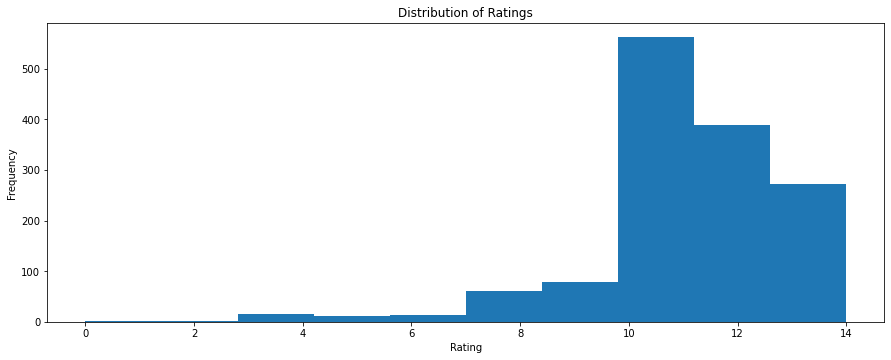

In [840]:
### distribution  of the ratings

tweet_api_clean.rating_numerator.plot(kind = "hist", bins = 10, title = "Distribution of Ratings").set_xlabel("Rating")

--------------------------------------------------

The rating distribution is heavily tilted to the left, with 75 percent of all ratings falling between 10 and 14, with 12 being the highest.

-------------------------------------------------

### The most rated dog breed

In [746]:
rate = tweet_api_clean.groupby("breed")["rating_numerator"].mean().to_frame().reset_index()

In [750]:
rate_10 = rate.sort_values(by = "rating_numerator", ascending = False).head(10)

Text(0.5, 0, 'Breed')

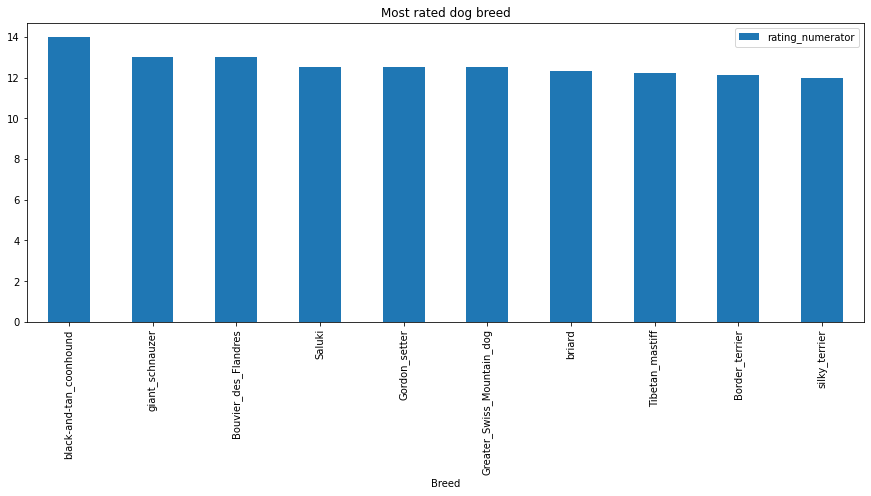

In [846]:
rate_10.plot(kind = "bar", x = "breed", y = "rating_numerator", title = "Most rated dog breed").set_xlabel("Breed")

The black and tan coonhound received the highest mean rating of 14.0, indicating that it was highly ranked among the breeds.

--------------------------

### The most rated dog stage

In [788]:
tweet_api_clean_notnone = tweet_api_clean[tweet_api_clean.dog_stage != "none"]

In [792]:
tweet_api_clean_notnone.dog_stage.value_counts()

pupper     158
doggo       70
puppo       23
floofer      8
none         0
Name: dog_stage, dtype: int64

In [789]:
name_rate = tweet_api_clean_notnone .groupby("dog_stage")["rating_numerator"].mean().to_frame().reset_index()

In [790]:
name_rate_10 = name_rate.sort_values(by = "rating_numerator", ascending = False).head(10)

Text(0.5, 0, 'Dog_stage')

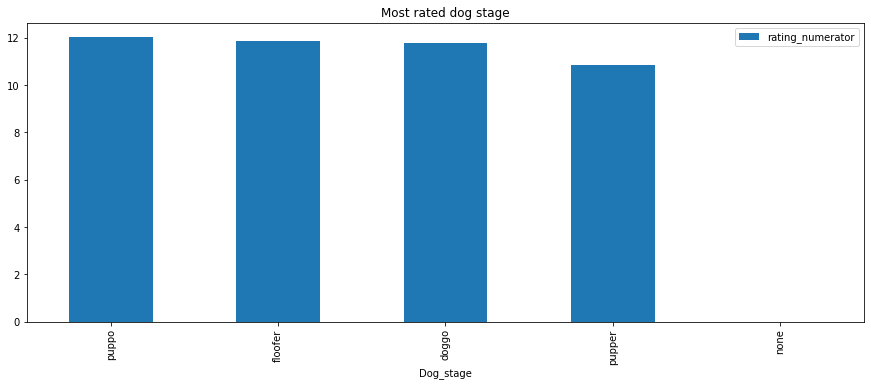

In [843]:
name_rate_10.plot(kind = "bar", x = "dog_stage", y = "rating_numerator", title = "Most rated dog stage").set_xlabel("Dog_stage")

Puppo had the highest mean rating of 12.04, indicating that it was the most highly ranked dogstage, which is closely followed by floofer and doggo

-----------------------

### Top 10 dog breeds by tweet_count

In [847]:
breed_exclusive = tweet_api_clean[tweet_api_clean.breed != "none"]

Text(0, 0.5, 'breed')

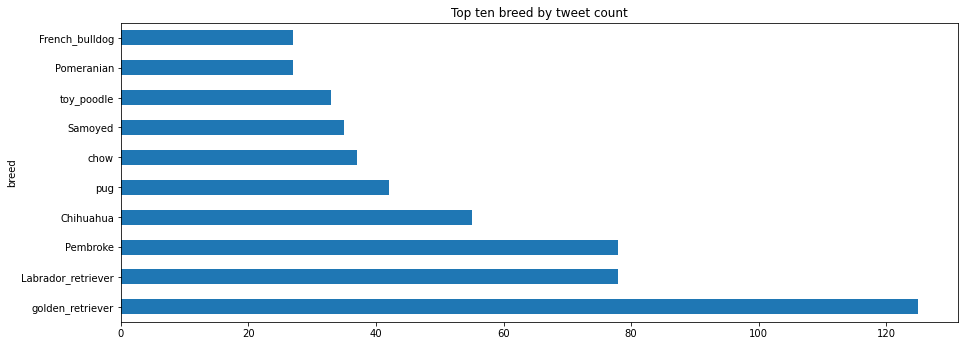

In [859]:
breed_exclusive.breed.value_counts().head(10).plot(kind = "barh", title = "Top ten breed by tweet count").set_ylabel("breed")

The Golden Retriever is the most popular dog, with about 125 tweets, as shown in the bar chart above. Second, third, and fourth position are Labrador Retrievers, Pembroke Spaniels, and Chihuahuas, respectively.

In [805]:
breed_like = breed_exclusive.groupby(['breed'])
top_10_like = breed_like.favorites.sum().sort_values(ascending = False).head(10)

Text(0, 0.5, 'breed')

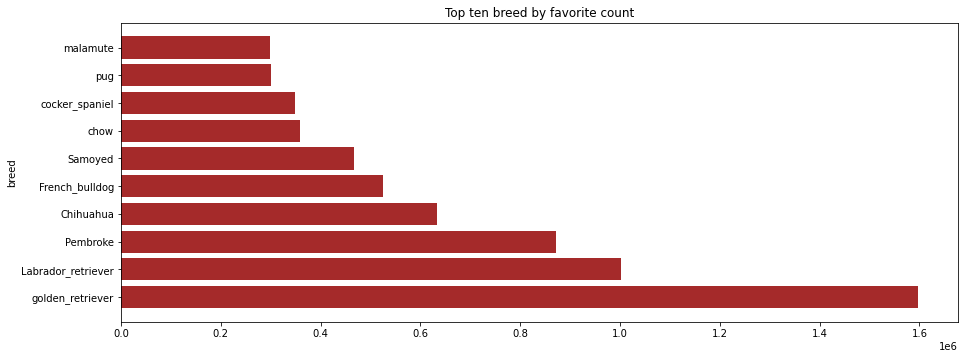

In [865]:
plt.barh(top_10_like.index, top_10_like, color = 'brown')
plt.title("Top ten breed by favorite count")
plt.ylabel("breed")

The chart above depicts the top ten dog breeds in terms of favourite counts. It matches the barplot of the top 10 dog breeds ordered by tweet from earlier, and the top four dog breeds are the same.

-----------------------------

### Tweet with the most favourite_count

In [816]:
tweet_api_clean.sort_values(by = 'favorites', ascending = False).head(1)[["text", "date_time","favorites","retweets","dog_stage","breed", "rating_numerator"]]

text  \
756  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4   

                    date_time  favorites  retweets dog_stage  \
756 2016-06-18 18:26:18+00:00     145081     70872     doggo   

                  breed  rating_numerator  
756  Labrador_retriever                13

### Tweet with the most retweet_count

In [817]:
tweet_api_clean.sort_values(by = 'retweets', ascending = False).head(1)[["text", "date_time","favorites","retweets","dog_stage","breed","rating_numerator"]]

text  \
756  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4   

                    date_time  favorites  retweets dog_stage  \
756 2016-06-18 18:26:18+00:00     145081     70872     doggo   

                  breed  rating_numerator  
756  Labrador_retriever                13

Here it shows that the most liked tweet, is also the most retweeted tweet, futhermore I'll check if there's a correlation between retweets and favourites

--------------------------

> ## Insight 2

### Correlation between Retweets and Favorites

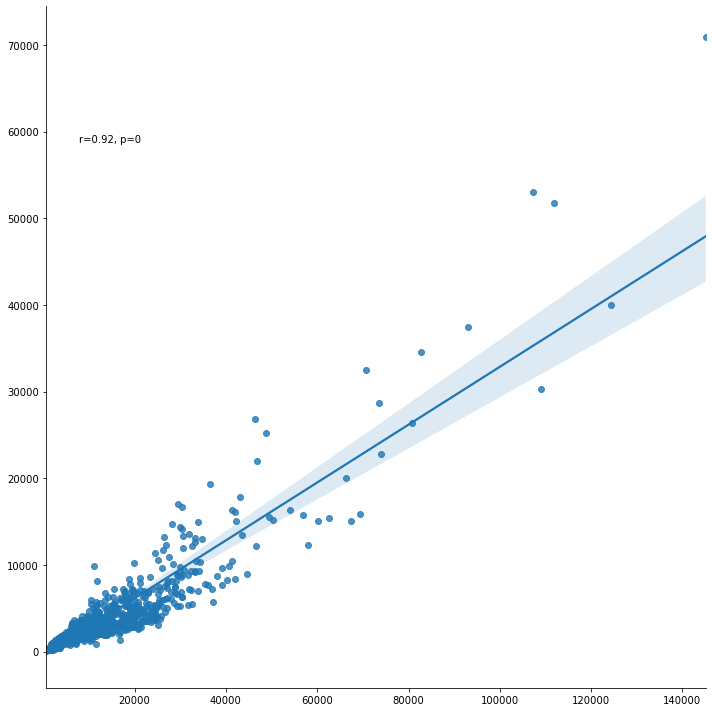

In [815]:
#https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

import seaborn as sns
import scipy as sp

g = sns.lmplot(x='favorites', y='retweets', data=tweet_api_clean, height=10, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['favorites'], data['retweets'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

Retweet numbers and favorite counts have a strong positive correlation with a rsquared of 0.92. As the number of favorites increases, so does the number of retweets. Tweets with a high favorite count and a high retweet count receive higher ratings as well.

> ## Insight 3

### Because the golden retriever is the breed with the most retweets and favorites, I'd like to dig more into it and observe how it changes through time.

In [540]:
golden_retriever = breed_exclusive[breed_exclusive.breed == "golden_retriever"]

In [660]:
golden_group_month = golden_retriever.groupby(["breed","month"])["breed"].count().to_frame()
golden_group_month = golden_group_month.droplevel(0).reset_index()
golden_group_month.rename(columns = {'breed':'value'}, inplace = True)
golden_group_month["breed"] = "golden_retriever"

In [ ]:
Relationship with Date

<AxesSubplot:xlabel='month'>

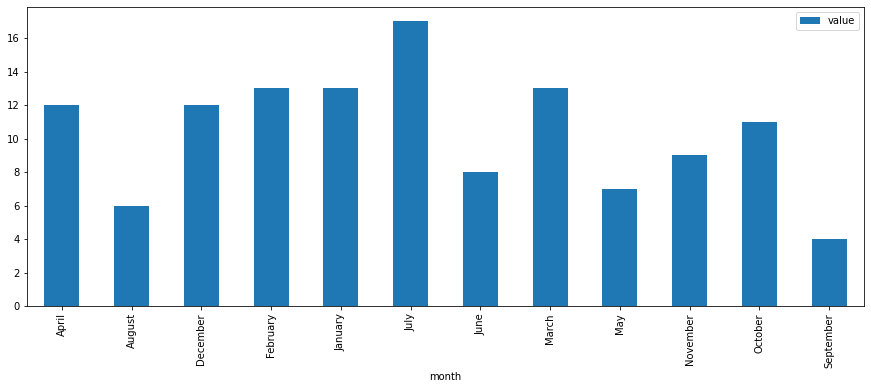

In [661]:
golden_group_month.plot.bar(x='month', y='value')

The number of golden retriever tweets fluctuated across the months, with the highest in July and the lowest in September.

In [680]:
golden_group_day = golden_retriever.groupby(["breed","day"])["breed"].count().to_frame()
golden_group_day = golden_group_day.droplevel(0).reset_index()
golden_group_day.rename(columns = {'breed':'value'}, inplace = True)
golden_group_day["breed"] = "golden_retriever"

<AxesSubplot:xlabel='day'>

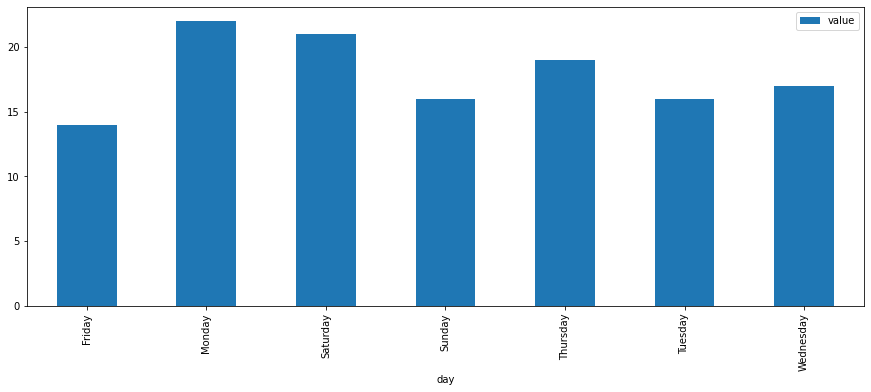

In [664]:
golden_group_day.plot.bar(x='day', y='value')

In [667]:
golden_group_year = golden_retriever.groupby(["breed","year"])["breed"].count().to_frame()
golden_group_year = golden_group_year.droplevel(0).reset_index()
golden_group_year.rename(columns = {'breed':'value'}, inplace = True)
golden_group_year["breed"] = "golden_retriever"

In [849]:
import squarify as sq

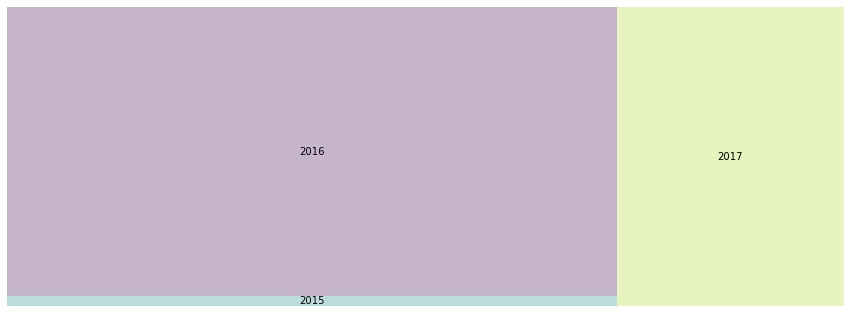

In [855]:
# https://www.python-graph-gallery.com/treemap/
sq.plot(sizes=golden_group_year['value'], label=golden_group_year['year'], alpha=.3 )
plt.axis('off')
plt.show()

The most tweets for golden retrievers were in 2016, and these tweets were often high in volume on Mondays and Saturdays, so if any paid advertising was to be done, Mondays and Saturdays would be a suitable time.

------------------------------

In [676]:
golden_group_source = golden_retriever.groupby(["breed","source"])["breed"].count().to_frame()
golden_group_source = golden_group_source.droplevel(0).reset_index()
golden_group_source.rename(columns = {'breed':'value'}, inplace = True)
golden_group_source["breed"] = "golden_retriever"

([<matplotlib.patches.Wedge at 0x1419b619280>,
 [Text(1.0996526081786313, 0.027643106300371798, 'TweetDeck'),
  Text(-1.0996526095535764, -0.027643051604514343, 'Twitter for iPhone')])

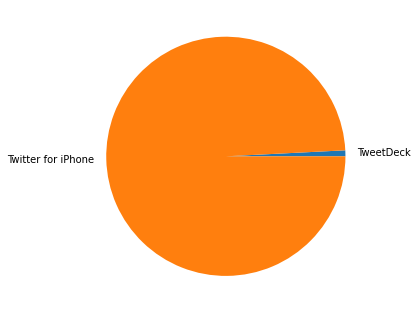

In [831]:
plt.pie(golden_group_source.value, labels = golden_group_source.source)

We can observe that the majority of tweets on golden retrievers are sent from an iPhone.

-------------------